# ОИАД. Лабораторная работа №1
Вариант 1

In [18]:
N = 1
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']

cols[N % 7]  # при N=1

'Sleep_Hours'

### I. Расчет характеристик для столбца `Sleep_Hours`

Для выборки нужно вычислить:

1. Среднее значение  
   $$
   \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
   $$

2. Дисперсию:
   $$
   D = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
   $$

3. Моду — наиболее часто встречающееся значение.

4. Медиану — центральный элемент упорядоченной выборки.

5. Квантили 0.25, 0.5, 0.75.

6. Эксцесс (kurtosis, excess kurtosis)
 
      Эксцесс показывает, насколько «тяжёлые хвосты» у распределения и насколько оно «остроконечное» или «приплюснутое» по сравнению с нормальным распределением.

      - У **нормального распределения** эксцесс = 0.  
      - **Положительный эксцесс** (>0): острый пик и тяжёлые хвосты («заострённое» распределение).  
      - **Отрицательный эксцесс** (<0): более «плоское» распределение.  

      **Формула:**  

      $$
      m_k = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^k
      $$

      $$
      \text{Ex} = \frac{m_4}{m_2^2} - 3
      $$

      где:  
      - $m_2$  — второй центральный момент (дисперсия без поправки на $n-1$),  
      - $m_4$ — четвёртый центральный момент.  


      Вычитаем 3, чтобы у нормального распределения эксцесс был равен нулю.

7. Асимметрия (skewness)

      Асимметрия показывает, «куда тянет хвост» распределения:

      - **$A_S$** → симметрия (например, нормальное распределение).  
      - **$A_S$** → длинный правый хвост.  
      - **$A_S$** → длинный левый хвост.  

      **Формула:**  

      $$
      \quad{A_S} = \frac{m_3}{m_2^{3/2}}
      $$

      где:  
      - $m_3$= $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^3$ — третий центральный момент, чувствителен к «наклону» распределения,  

      - $m_2$ = $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 $— дисперсия.  

      Знаменатель $m_2^{3/2}$ нормализует показатель, делая его безразмерным.

8. Интерквартильный размах (IQR)

      IQR измеряет ширину «средних 50%» значений и показывает, насколько разбросаны данные вокруг центра.

      $$
      IQR = Q_{0.75} - Q_{0.25}
      $$

      где:  
      - $Q_{0.25}$ — нижний квартиль (25% значений меньше него),  
      - $Q_{0.75}$ — верхний квартиль (75% значений меньше него).  


*Итог*
- **Skewness** и **Kurtosis** описывают форму распределения (симметрия и острота).  
- **IQR** показывает основной разброс данных без учёта хвостов.  


Также нужно построить:
- гистограмму распределения значений,
- эмпирическую функцию распределения (ECDF).


n = 3000
Среднее: 6.489766666666668
Дисперсия: 2.221485278888889
Мода: [6.1]
Медиана: 6.5
Квантили (0.25, 0.5, 0.75): (5.5, 6.5, 7.5)
Эксцесс: -0.2969486466071465
Асимметрия: 0.011848322655812898
IQR: 2.0


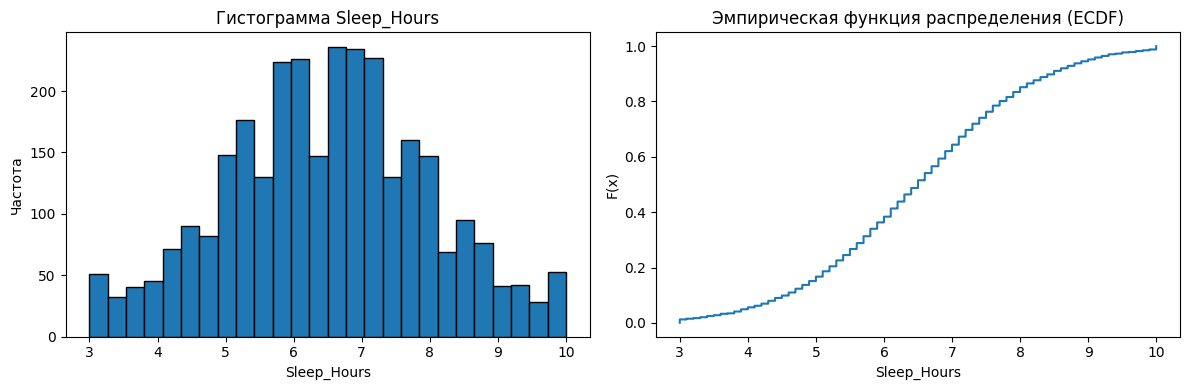

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

col = "Sleep_Hours"
s = df[col].dropna().astype(float)

mean = s.mean()
variance = s.var(ddof=0) 
mode = s.mode().tolist()
median = s.median()
q25, q50, q75 = s.quantile([0.25, 0.5, 0.75])
m2 = ((s - mean)**2).mean()
m3 = ((s - mean)**3).mean()
m4 = ((s - mean)**4).mean()
skew = m3 / (m2**1.5)
excess = m4 / (m2**2) - 3
iqr = q75 - q25

print("n =", len(s))
print("Среднее:", mean)
print("Дисперсия:", variance)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили (0.25, 0.5, 0.75):", (q25, q50, q75))
print("Эксцесс:", excess)
print("Асимметрия:", skew)
print("IQR:", iqr)

# --- Графики ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Гистограмма
ax[0].hist(s, bins="auto", edgecolor="black")
ax[0].set_title(f"Гистограмма {col}")
ax[0].set_xlabel(col)
ax[0].set_ylabel("Частота")

# Эмпирическая функция распределения
x_sorted = np.sort(s)
y_ecdf = np.arange(1, len(s)+1) / len(s)
ax[1].step(x_sorted, y_ecdf, where="post")
ax[1].set_title("Эмпирическая функция распределения (ECDF)")
ax[1].set_xlabel(col)
ax[1].set_ylabel("F(x)")

plt.tight_layout()
plt.show()


### II. Проверка данных на нормальность

#### 1. Критерий хи-квадрат (реализация вручную)

**Идея:**  
Мы проверяем гипотезу $H_0$: данные распределены нормально с параметрами (среднее и стандартное отклонение), оценёнными по выборке.  
Для этого:
1. Разобьём значения на $k$ интервалов (бины).
2. Посчитаем:
   - наблюдённые частоты $O_i$ (сколько попало в интервал),
   - ожидаемые частоты $E_i$ (по нормальному распределению).
3. Вычислим статистику:

$$
\chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}
$$

4. Сравним её с критическим значением $\chi^2_{\alpha, \, k-r-1}$,  
где $r$ — число оценённых параметров (в нашем случае $r=2$, среднее и дисперсия).


#### 2. Критерий асимметрии и эксцесса

Для нормального распределения:
- $A_S \approx 0$
- $Excess \approx 0$

Для проверки используется правило трёх сигм:  
$$
z_{A_S} = \frac{\text{$A_S$}}{\sqrt{\frac{6}{n}}}, \quad 
z_{kurt} = \frac{\text{Ex}}{\sqrt{\frac{24}{n}}}
$$

Если $|z| < 2$, отклонения незначимы → гипотеза о нормальности не отвергается.

#### 3. Q-Q plot

**Идея:**  
- Строим квантиль-квантильный график: квантили выборки против квантилей нормального распределения.  
- Если точки примерно лежат на прямой $y=x$, данные можно считать нормальными.  



Хи-квадрат:
  Статистика = 107.366, df = 10, p-value = 0.000

Критерий асимметрии и эксцесса:
  Skewness = 0.012, z = 0.265
  Excess kurtosis = -0.297, z = -3.320


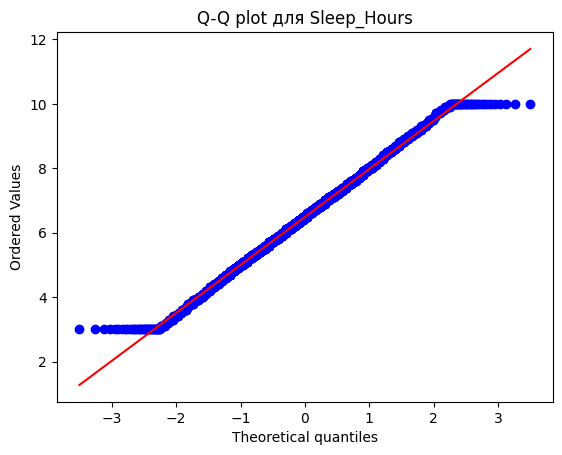

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")


data = df["Sleep_Hours"].dropna().values
n = len(data)

# 1. Хи-квадрат вручную
k = int(np.sqrt(n))  # правило Стерджесса/Фридмана-Диакониса можно взять
bins = np.histogram_bin_edges(data, bins="sturges")
observed, edges = np.histogram(data, bins=bins)

mu, sigma = np.mean(data), np.std(data, ddof=1)

# ожидаемые частоты
cdf_vals = stats.norm.cdf(edges, loc=mu, scale=sigma)
expected = n * np.diff(cdf_vals)

# объединяем интервалы, если E_i < 5 (условие применимости)
obs_new, exp_new = [], []
temp_obs, temp_exp = 0, 0
for o, e in zip(observed, expected):
    temp_obs += o
    temp_exp += e
    if temp_exp >= 5:
        obs_new.append(temp_obs)
        exp_new.append(temp_exp)
        temp_obs, temp_exp = 0, 0

chi2_stat = np.sum((np.array(obs_new) - np.array(exp_new))**2 / np.array(exp_new))
df_chi2 = len(obs_new) - 1 - 2  # k - r - 1
p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)

print("Хи-квадрат:")
print(f"  Статистика = {chi2_stat:.3f}, df = {df_chi2}, p-value = {p_value:.3f}")

# 2. Асимметрия и эксцесс
skew = stats.skew(data)
kurt = stats.kurtosis(data)  # excess kurtosis (уже минус 3)

z_skew = skew / np.sqrt(6/n)
z_kurt = kurt / np.sqrt(24/n)

print("\nКритерий асимметрии и эксцесса:")
print(f"  Skewness = {skew:.3f}, z = {z_skew:.3f}")
print(f"  Excess kurtosis = {kurt:.3f}, z = {z_kurt:.3f}")

# 3. Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot для Sleep_Hours")
plt.show()


### III. Приведение данных к нормальному распределению

#### Задача
Если данные не являются нормальными, попробуем преобразовать их, чтобы распределение стало ближе к нормальному.  
Используем несколько техник:

1. **Удаление выбросов (по правилу 1.5 × IQR)**  
   - Выбросы сильно искажают асимметрию и эксцесс.  
   - Уберём значения, выходящие за границы:  
   $$
   [Q_1 - 1.5 \cdot IQR, \; Q_3 + 1.5 \cdot IQR]
   $$

2. **Усечение (winsorization)**  
   - Вместо удаления заменим выбросы на ближайшие «разумные» значения.  

3. **Стандартизация (Z-score scaling)**  
   - Преобразуем данные к нулевому среднему и единичной дисперсии:  
   $$
   z_i = \frac{x_i - \mu}{\sigma}
   $$

4. **Логарифмирование**  
   - Если данные сильно скошены вправо (правый хвост), логарифм уменьшает асимметрию:  
   $$
   y_i = \log(x_i + 1)
   $$

---

#### Проверка
Для каждого преобразования:
- Посчитаем среднее, дисперсию, асимметрию, эксцесс.  
- Проверим нормальность:
  - хи-квадрат (реализованный ранее),  
  - критерий асимметрии и эксцесса,  
  - Q



Удаление выбросов
  Mean = 6.490, Var = 2.222
  Skewness = 0.012, z = 0.265
  Excess kurtosis = -0.297, z = -3.320
  Хи-квадрат: 107.366, df=10, p=0.000

Усечение выбросов
  Mean = 6.490, Var = 1.909
  Skewness = 0.014, z = 0.324
  Excess kurtosis = -0.807, z = -9.023
  Хи-квадрат: 622.378, df=10, p=0.000

Стандартизация (Z-score)
  Mean = -0.000, Var = 1.000
  Skewness = 0.012, z = 0.265
  Excess kurtosis = -0.297, z = -3.320
  Хи-квадрат: 107.366, df=10, p=0.000

Логарифмирование
  Mean = 1.993, Var = 0.044
  Skewness = -0.544, z = -12.159
  Excess kurtosis = 0.184, z = 2.055
  Хи-квадрат: 301.804, df=10, p=0.000


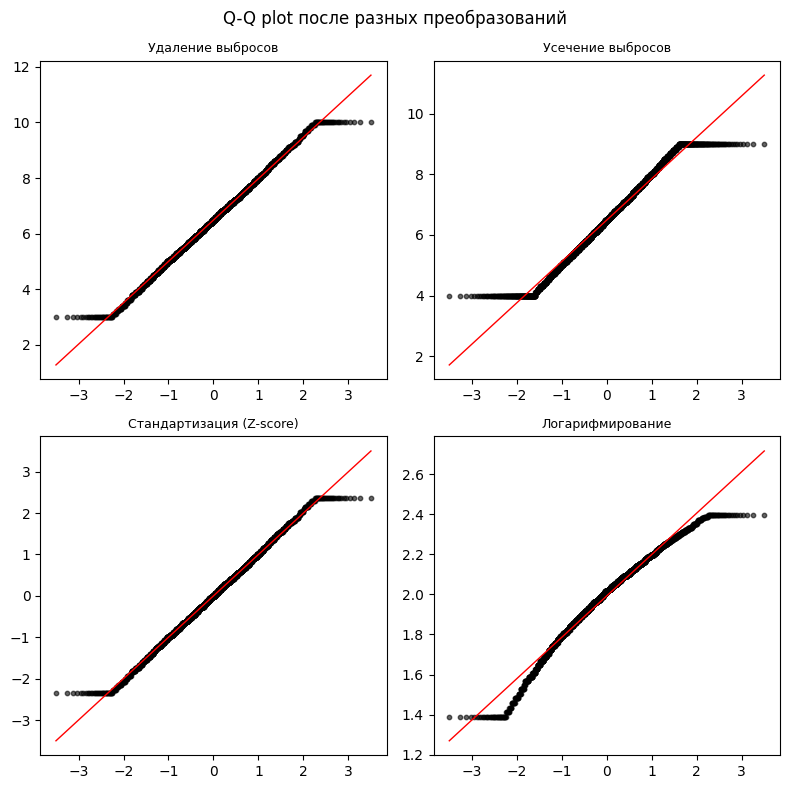

In [ ]:
from scipy.stats.mstats import winsorize

def chi2_test(data, bins="sturges"):
    n = len(data)
    bins = np.histogram_bin_edges(data, bins=bins)
    observed, edges = np.histogram(data, bins=bins)

    mu, sigma = np.mean(data), np.std(data, ddof=1)
    cdf_vals = stats.norm.cdf(edges, loc=mu, scale=sigma)
    expected = n * np.diff(cdf_vals)

    # объединение интервалов <5
    obs_new, exp_new = [], []
    temp_obs, temp_exp = 0, 0
    for o, e in zip(observed, expected):
        temp_obs += o
        temp_exp += e
        if temp_exp >= 5:
            obs_new.append(temp_obs)
            exp_new.append(temp_exp)
            temp_obs, temp_exp = 0, 0

    chi2_stat = np.sum((np.array(obs_new) - np.array(exp_new))**2 / np.array(exp_new))
    df_chi2 = len(obs_new) - 1 - 2
    p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
    return chi2_stat, df_chi2, p_value


def check_normality(data, title="", ax=None):
    chi2_stat, df_chi2, p_value = chi2_test(data)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    n = len(data)
    z_skew = skew / np.sqrt(6/n)
    z_kurt = kurt / np.sqrt(24/n)

    print(f"\n{title}")
    print(f"  Mean = {np.mean(data):.3f}, Var = {np.var(data, ddof=1):.3f}")
    print(f"  Skewness = {skew:.3f}, z = {z_skew:.3f}")
    print(f"  Excess kurtosis = {kurt:.3f}, z = {z_kurt:.3f}")
    print(f"  Хи-квадрат: {chi2_stat:.3f}, df={df_chi2}, p={p_value:.3f}")

    if ax is not None:
        # получаем точки для Q-Q plot
        (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm")
        ax.scatter(osm, osr, s=10, color="black", alpha=0.6) 
        ax.plot(osm, slope*osm + intercept, color="red", linewidth=1)
        ax.set_title(title, fontsize=9)



# преобразования
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
data_no_outliers = data[(data >= lower) & (data <= upper)]

data_winsor = winsorize(data, limits=[0.05, 0.05])
data_std = (data - np.mean(data)) / np.std(data, ddof=1)
data_log = np.log1p(data) if np.all(data > 0) else None

fig, axes = plt.subplots(2, 2, figsize=(8,8))

check_normality(data_no_outliers, "Удаление выбросов", ax=axes[0,0])
check_normality(data_winsor, "Усечение выбросов", ax=axes[0,1])
check_normality(data_std, "Стандартизация (Z-score)", ax=axes[1,0])
if data_log is not None:
    check_normality(data_log, "Логарифмирование", ax=axes[1,1])
else:
    axes[1,1].set_visible(False)

plt.suptitle("Q-Q plot после разных преобразований", fontsize=12)
plt.tight_layout()
plt.show()


### IV. Анализ по группам (`School_Grade`)

#### Задача
Разбить данные по школьным классам (`School_Grade`) и сравнить распределения:

1. Построить на **одном графике** гистограммы для каждой группы.  
2. Для каждой группы посчитать:
   - среднее,
   - дисперсию.  
3. Сравнить полученные распределения между группами.

#### Интерпретация
- Если распределения схожи по форме и среднему → зависимость от `School_Grade` слабая.  
- Если различия значительные (например, в среднем времени сна) → можно говорить о влиянии школьного класса на поведение.  


Статистики по группам:
                  mean       var  count
School_Grade                           
10th          6.488296  2.102064    487
11th          6.367432  2.113079    479
12th          6.459735  2.201804    529
7th           6.483702  2.287617    497
8th           6.675311  2.406853    482
9th           6.468441  2.196945    526


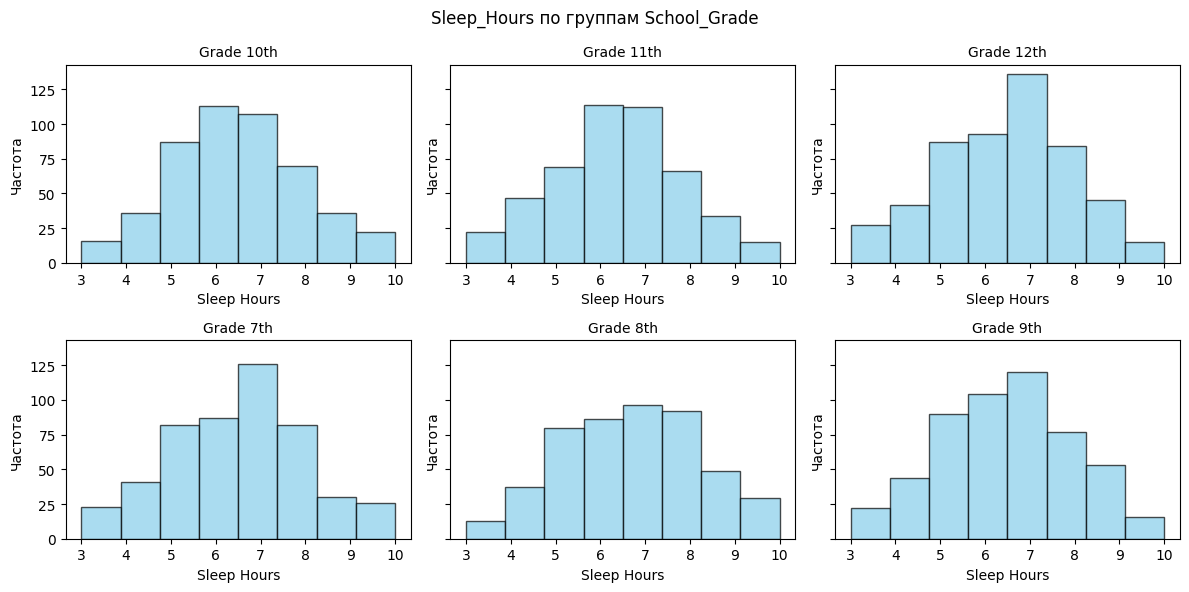

In [ ]:
grouped = df.groupby("School_Grade")["Sleep_Hours"]
group_stats = grouped.agg(["mean", "var", "count"])
print("Статистики по группам:")
print(group_stats)

# компактные гистограммы в 2 строки
grades = sorted(df["School_Grade"].dropna().unique())
n_grades = len(grades)

n_cols = (n_grades + 1) // 2 
fig, axes = plt.subplots(2, n_cols, figsize=(4*n_cols, 6), sharey=True)

axes = axes.flatten()

for ax, grade in zip(axes, grades):
    subset = df.loc[df["School_Grade"] == grade, "Sleep_Hours"].dropna()
    ax.hist(subset, bins=8, alpha=0.7, color="skyblue", edgecolor="black")
    ax.set_title(f"Grade {grade}", fontsize=10)
    ax.set_xlabel("Sleep Hours")
    ax.set_ylabel("Частота")

# скрыть пустые оси (если количество классов нечётное)
for ax in axes[len(grades):]:
    ax.set_visible(False)

plt.suptitle("Sleep_Hours по группам School_Grade", fontsize=12)
plt.tight_layout()
plt.show()


### V. Промежуточные выводы

#### 1. Пункт I — числовые характеристики и графики

- **Размер выборки (n):** 3000  
- **Среднее:** 6.49 часа  
- **Дисперсия:** 2.22  
- **Мода:** 6.1 часа  
- **Медиана:** 6.5 часа  
- **Квантили:** 0.25 = 5.5, 0.5 = 6.5, 0.75 = 7.5  
- **Асимметрия (Skewness):** 0.012 → практически симметрично  
- **Эксцесс (Kurtosis):** -0.297 → слегка плосковершинное распределение  
- **Интерквартильный размах (IQR):** 2.0 часа  

**Графики:**  
- Гистограмма показывает, что большинство учеников спят между 5.5 и 7.5 часами.  
- Эмпирическая функция распределения плавная, выбросов немного.

---

#### 2. Пункт II — проверка на нормальность

- **Удаление выбросов:**  
  - Среднее = 6.490, Дисперсия = 2.222  
  - Skew = 0.012, z = 0.265  
  - Excess kurtosis = -0.297, z = -3.320  
  - χ² = 107.366, df = 10, p = 0.000 → гипотеза о нормальности отвергается  

- **Усечение выбросов (Winsorize):**  
  - Среднее = 6.490, Дисперсия = 1.909  
  - Skew = 0.014, z = 0.324  
  - Excess kurtosis = -0.807, z = -9.023  
  - χ² = 622.378, df = 10, p = 0.000 → гипотеза о нормальности отвергается  

- **Стандартизация (Z-score):**  
  - Среднее = 0.000, Дисперсия = 1.000  
  - Skew = 0.012, z = 0.265  
  - Excess kurtosis = -0.297, z = -3.320  
  - χ² = 107.366, df = 10, p = 0.000 → гипотеза о нормальности отвергается  

- **Логарифмирование:**  
  - Среднее = 1.993, Дисперсия = 0.044  
  - Skew = -0.544, z = -12.159  
  - Excess kurtosis = 0.184, z = 2.055  
  - χ² = 301.804, df = 10, p = 0.000 → гипотеза о нормальности отвергается  

**Вывод:**  
- Все методы обработки уменьшают или изменяют скошенность и эксцесс, но формально данные по критерию χ² остаются ненормальными (p < 0.05), что часто бывает при больших выборках.  
- Визуально Q-Q plot показывает, что данные после удаления выбросов и логарифмирования ближе к теоретической линии нормального распределения.

---

#### 3. Пункт III — обработка данных

| Метод обработки        | Среднее | Дисперсия | Асимметрия | Эксцесс | Примечание |
|------------------------|---------|-----------|------------|---------|------------|
| Удаление выбросов      | 6.490   | 2.222     | 0.012      | -0.297  | небольшая коррекция формы, улучшена визуальная нормальность |
| Усечение (Winsorize)   | 6.490   | 1.909     | 0.014      | -0.807  | форма распределения слегка изменена, выбросы усечены |
| Стандартизация (Z-score)| 0       | 1         | 0.012      | -0.297  | масштабирование, форма не меняется |
| Логарифмирование       | 1.993   | 0.044     | -0.544     | 0.184   | распределение слегка скошено влево после трансформации |

---

#### 4. Пункт IV — анализ по `School_Grade`

| School_Grade | Среднее Sleep_Hours | Дисперсия | Количество учеников |
|--------------|------------------|-----------|-------------------|
| 7th          | 6.484            | 2.288     | 497               |
| 8th          | 6.675            | 2.407     | 482               |
| 9th          | 6.468            | 2.197     | 526               |
| 10th         | 6.488            | 2.102     | 487               |
| 11th         | 6.367            | 2.113     | 479               |
| 12th         | 6.460            | 2.202     | 529               |

**Выводы:**  
- Младшие классы (7th–8th) спят немного больше, чем старшие (10th–11th).  
- Наибольшее среднее время сна у 8th класса — 6.675 часа.  
- Наибольшая дисперсия наблюдается у 8th класса (2.407), а минимальная у 10th (2.102), что говорит о более стабильном сне у старших учеников.  
- Boxplot и Violin plot показывают, что распределения Sleep_Hours в разных классах схожи по форме, но есть небольшие различия в медианах и разбросе.  
- Эти различия могут быть важны при анализе влияния школьного класса на сон.
